In [6]:
import pandas as pd
import numpy as pi

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [7]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

bank_cust_data = pd.read_csv("/kaggle/input/personal-loan-modeling/Bank_Personal_Loan_Modelling.csv")

bank_cust_data.head()

/kaggle/input/personal-loan-modeling/Bank_Personal_Loan_Modelling.csv


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:

print("Shape of the data :{0}".format(bank_cust_data.shape))
print("Size of the data :{0}".format(bank_cust_data.size))
print("nDim of the data :{0}".format(bank_cust_data.ndim))

bank_cust_data.describe()

Shape of the data :(5000, 14)
Size of the data :70000
nDim of the data :2


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
# Identify the types and the missing values of the data

print("\nList of Null values in each column")
print(bank_cust_data.isna().sum())

print("\nData types of each column")
print(bank_cust_data.dtypes)

#All fields are numeric and no missing values


List of Null values in each column
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Data types of each column
ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


Unique Values
[0 1]

Seacrching for 'scott' in all column
ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool


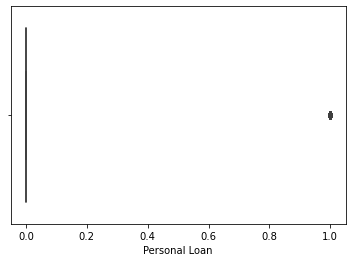

In [10]:
print("Unique Values")
print(bank_cust_data['Personal Loan'].unique())

print("\nSeacrching for 'scott' in all column")
print(bank_cust_data.isin(['scott']).any())

sns.boxplot('Personal Loan',data=bank_cust_data);

In [11]:
# Drop un-wanted column
bank_extract_data = bank_cust_data.drop(['ID'],axis=1).copy()

print('Shape of Data: ', bank_extract_data.shape)

print('\nMedian for the data')
print(bank_extract_data.median())

print('\nMode for the data')
print(bank_extract_data.mode())

print('\n Five Point Summary for the data')
bank_extract_data.describe()

Shape of Data:  (5000, 13)

Median for the data
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

Mode for the data
   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   35          32      44     94720       1    0.3          1         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   0           0       1           0  

 Five Point Summary for the data


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
# Unique values for the categorical

print('Number of Unique values of ZipCodes: ',bank_extract_data['ZIP Code'].nunique())
print('Unique values of Family: ',bank_extract_data['Family'].unique())
print('Unique values of Education: ',bank_extract_data['Education'].unique())
print('Unique values of Personal Loan: ',bank_extract_data['Personal Loan'].unique())
print('Unique values of Securities Account: ',bank_extract_data['Securities Account'].unique())
print('Unique values of CD Account ',bank_extract_data['CD Account'].unique())
print('Unique values of Online ',bank_extract_data['Online'].unique())
print('Unique values of CreditCard ',bank_extract_data['CreditCard'].unique())


print('\n*** Observation: Education attribute needs "One hot Encoding"')

Number of Unique values of ZipCodes:  467
Unique values of Family:  [4 3 1 2]
Unique values of Education:  [1 2 3]
Unique values of Personal Loan:  [0 1]
Unique values of Securities Account:  [1 0]
Unique values of CD Account  [0 1]
Unique values of Online  [0 1]
Unique values of CreditCard  [0 1]

*** Observation: Education attribute needs "One hot Encoding"


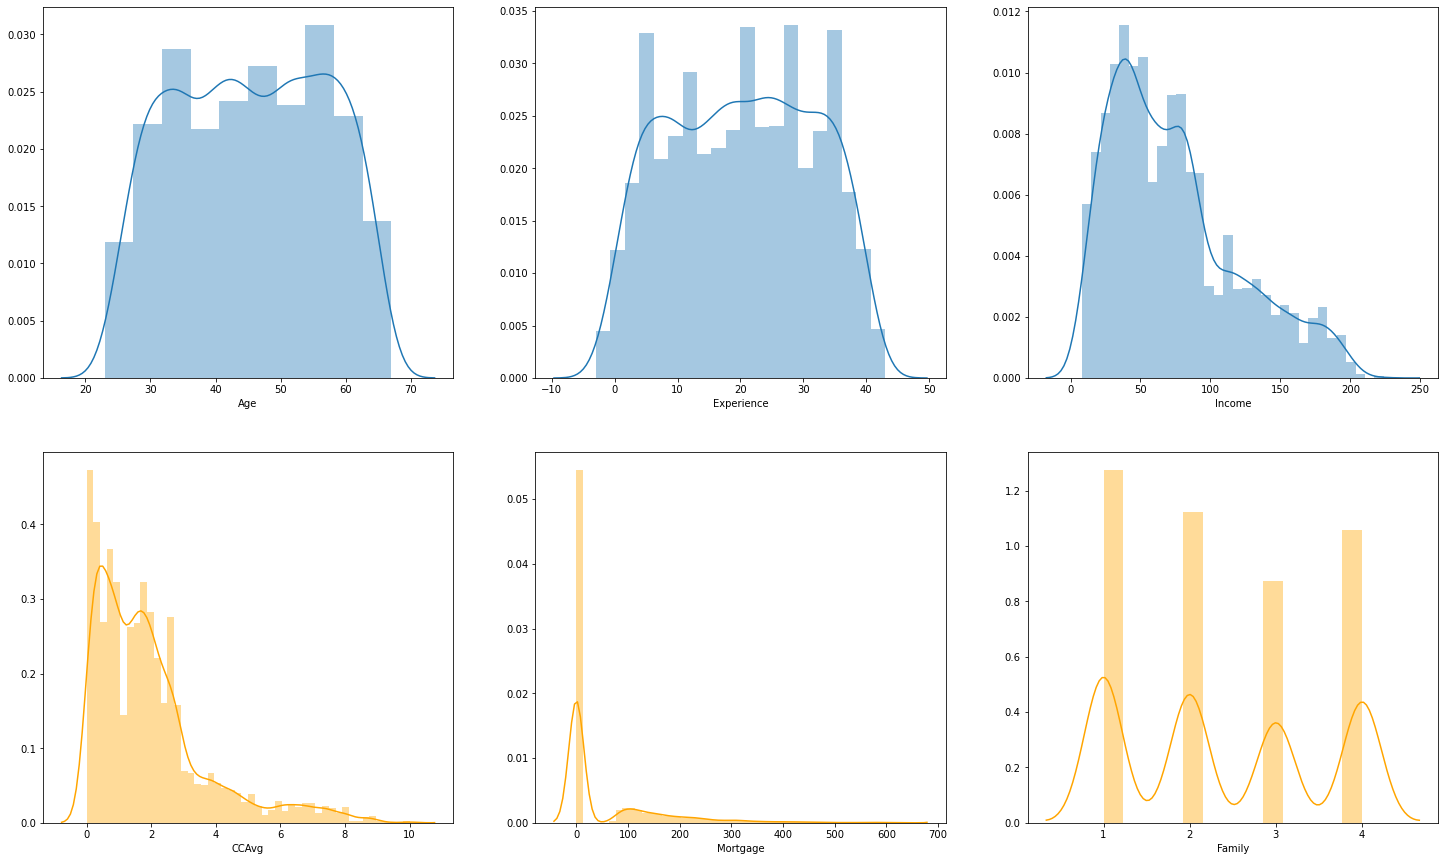

In [13]:
# Distribution for the non-categorical attributes

fig, axis = plt.subplots(2, 3, figsize=(25, 15), sharex=False)

sns.distplot(bank_extract_data['Age'],bins=10,ax=axis[0,0]);

sns.distplot(bank_extract_data['Experience'],ax=axis[0,1]);

sns.distplot(bank_extract_data['Income'],ax=axis[0,2]);

sns.distplot(bank_extract_data['CCAvg'],ax=axis[1,0],color='orange');

sns.distplot(bank_extract_data['Mortgage'],ax=axis[1,1],color='orange');

sns.distplot(bank_extract_data['Family'],ax=axis[1,2],color='orange');


plt.show()

### Summary

The parameter Age looks Normalise not much skew,
The parameter Experience is also Normalised not much skew

The parameter Income right skewed,
The parameter CCAvg right skewed,
The parameter Mortgage 

In [14]:
print("Age Parameter Right Skewed: ", bank_extract_data['Age'].mean() > bank_extract_data['Age'].median() )
print("CCAvg Parameter Right Skewed: ", bank_extract_data['CCAvg'].mean() > bank_extract_data['CCAvg'].median() )
print("Mortgage Parameter Right Skewed: ", bank_extract_data['CCAvg'].mean() > bank_extract_data['CCAvg'].median() )

print("\n*** The skwed data does not impact the algorithm we are going to use")

Age Parameter Right Skewed:  True
CCAvg Parameter Right Skewed:  True
Mortgage Parameter Right Skewed:  True

*** The skwed data does not impact the algorithm we are going to use


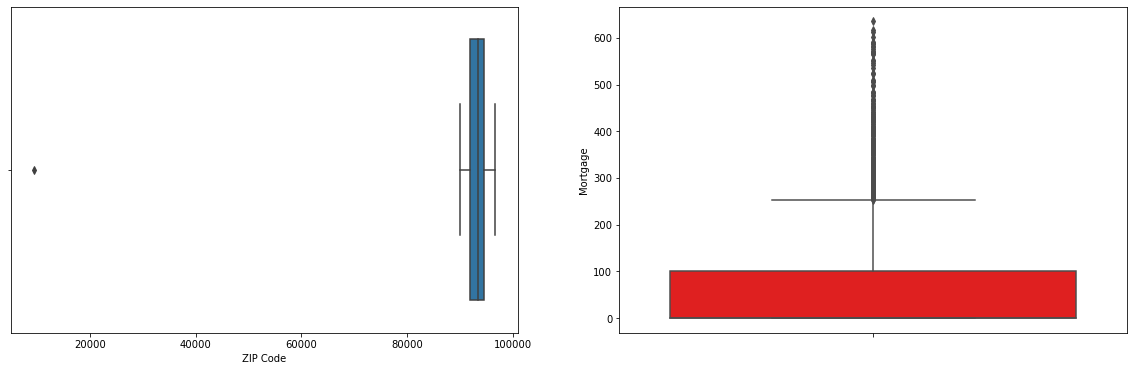

In [15]:
fig, axis1 = plt.subplots(1, 2, figsize=(20, 6), sharex=False)

sns.boxplot(bank_extract_data['ZIP Code'],ax=axis1[0],orient='h');
sns.boxplot(bank_extract_data['Mortgage'],ax=axis1[1],color='red',orient='v');

plt.show()

#The outlier shown below does not impact the algorithm hence we are leaving out the outliers

## Target variable - Analysis. 

#### Target variable is identified as "Personal Load" doing some analysis with on other variable

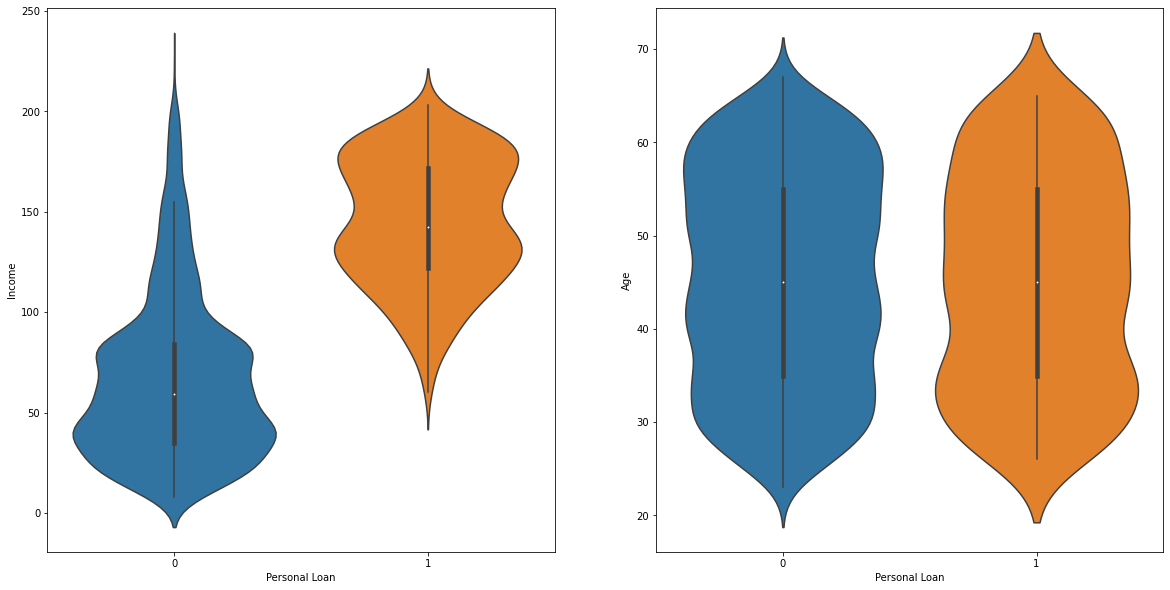

In [16]:
fig, axis = plt.subplots(1, 2, figsize=(20, 10), sharex=False)

sns.violinplot(bank_extract_data['Personal Loan'],bank_extract_data['Income'],ax=axis[0]);
sns.violinplot(bank_extract_data['Personal Loan'],bank_extract_data['Age'],ax=axis[1]);

plt.show()

<Figure size 432x288 with 0 Axes>

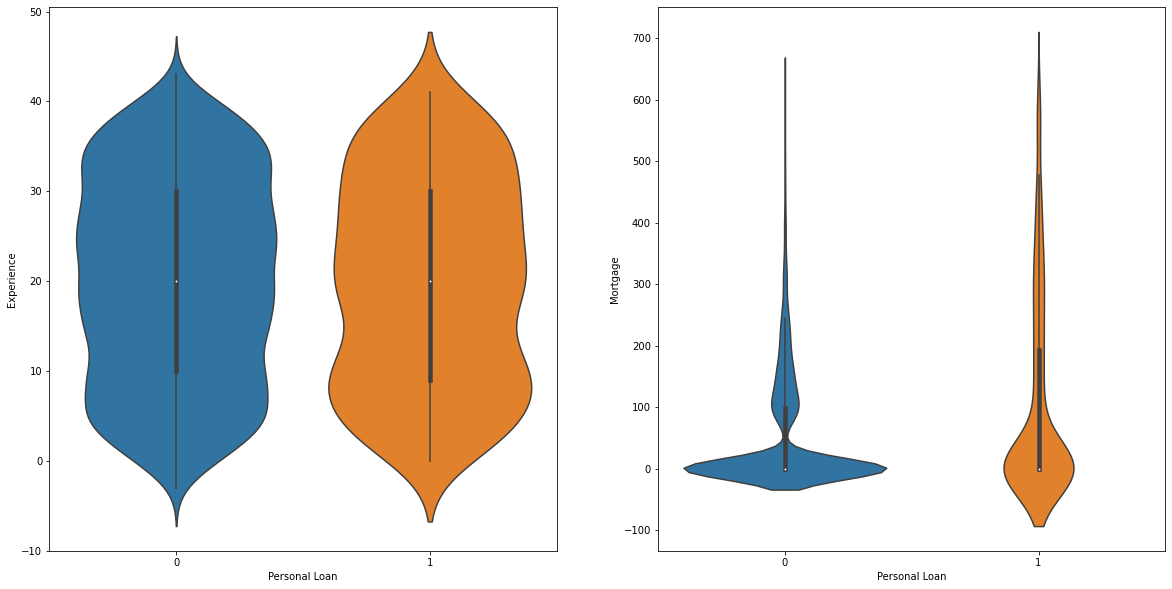

In [17]:
plt.clf()
fig, axis = plt.subplots(1, 2, figsize=(20, 10), sharex=False)

sns.violinplot(bank_extract_data['Personal Loan'],bank_extract_data['Experience'],ax=axis[0]);
sns.violinplot(bank_extract_data['Personal Loan'],bank_extract_data['Mortgage'],ax=axis[1]);

plt.show()


## Summary 

Interesting obeservations on the Personl Loan with Income, Age, Experience & Mortgage

The PL is positive for the higher income range
The PL is equally positive and negative with the Age, I would say Age does not matter on the PL
The PL has the effect for the Experience as well no difference
The PL has limited effect on Mortgage, non-mortgage people are mostly not interested on PL
(The not accepted loan seems higher for people without mortgage )


#### The target column(Personal Loan) looked to be un-balance the data, more observarion see below later


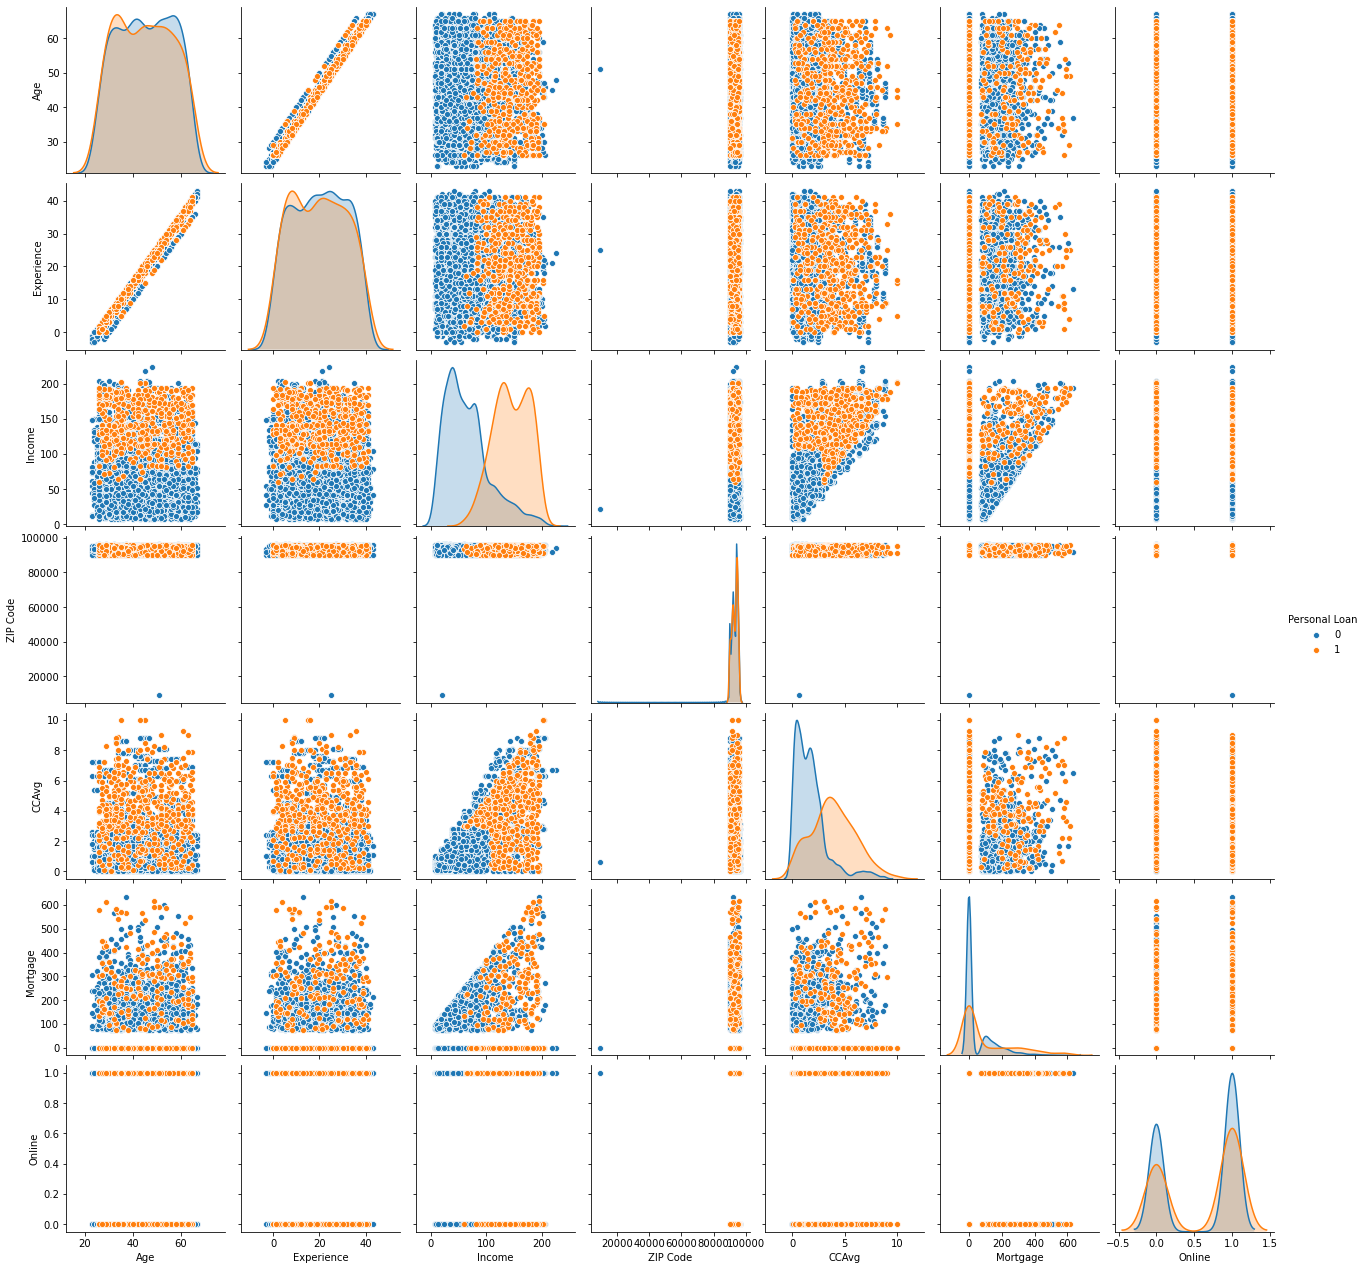

In [18]:
#bank_pairplot_data=bank_extract_data.drop(['Personal Loan',])

#bank_pairplot_data.head();

plot_vars=['Age','Experience','Income','ZIP Code','CCAvg','Mortgage','Online']

sns.pairplot(bank_extract_data,kind='scatter',x_vars=plot_vars,y_vars=plot_vars,hue='Personal Loan');

### Summary of pairplot

Some of the observations from the pairplots, as expexted the age vs experience is very linear. More the age and the experience is. 

Zipcode is a strange field does not have any corelation to other field, I expected it would make difference in the loan or the online, but it did nit

The CCAvg and the Income has a good corelation. More the income more the CC Avg, there are cases of less CCAvg with more Income group

The Mortage also looks similar and more linear, more the income and more the mortgage value

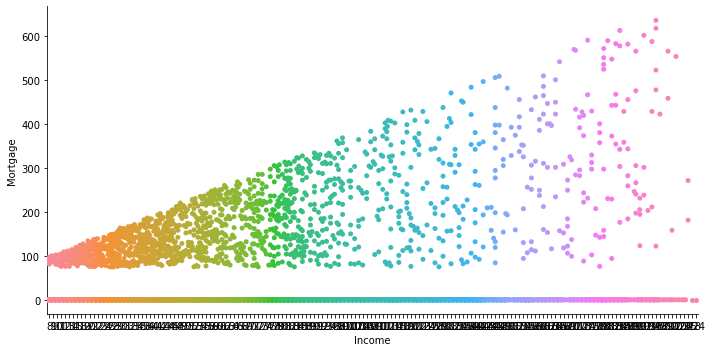

In [19]:
sns.catplot(x='Income', y='Mortgage', kind='swarm', data=bank_extract_data,aspect=2);

# Deeper look into income/Mortgage out of curiosity to see the linear reference

The correlated data based on threshold:  0.25


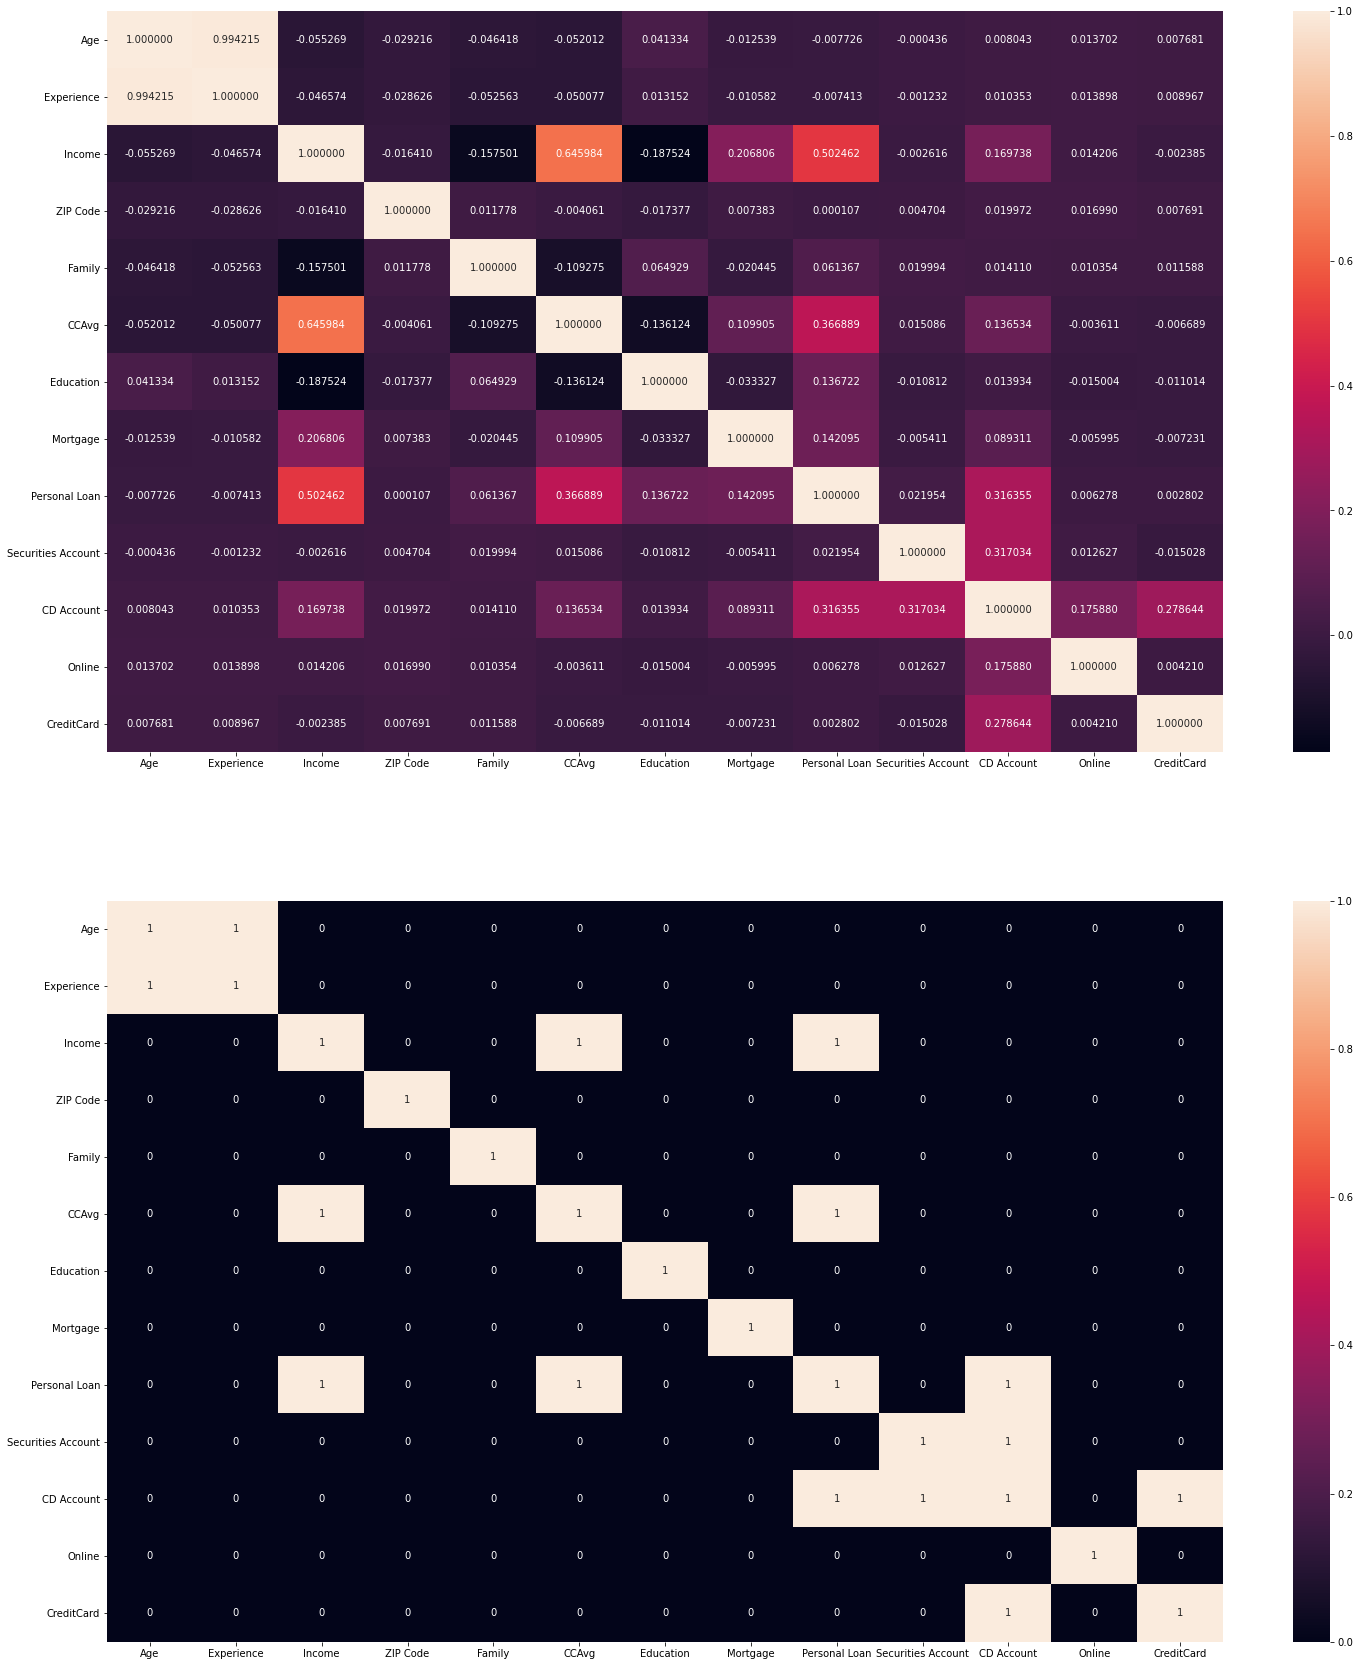

In [20]:
fig, axis = plt.subplots(2, 1, figsize=(25, 30), sharex=False)
threshold=0.25

sns.heatmap(bank_extract_data.corr(),annot=True,fmt='f',ax=axis[0])

filtered_data =pd.DataFrame(bank_extract_data.corr()>threshold)

print('The correlated data based on threshold: ',threshold)
sns.heatmap(filtered_data,annot=True,fmt='d',ax=axis[1]);
plt.show()


# As per corelation factor only 3 feilds are applicable, but considering all attributes as for now.
# so as the attributes might have other positive impact

# Spliting the training and test data

### Creating dummy columns for the education field 
### Reducing the income to monthly
### Reducing the mortgage value by 10 for consistency

In [21]:
# Applying encoding on the Education parameter to generate the even 0/1 parameter
bank_modified = pd.get_dummies(bank_extract_data['Education'],prefix='Edu_') 
bank_modified=pd.concat([bank_extract_data.copy(), bank_modified], axis=1)

parameter_drop=['Education'] # dropping the duplicate param

bank_modified.drop(parameter_drop,axis=1,inplace=True)

bank_modified['Income']=bank_extract_data['Income']/12 # Converting to the monthly income
bank_modified['Mortgage']=bank_extract_data['Mortgage']/10 # reducing the mortgage to normalise data

bank_modified.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu__1,Edu__2,Edu__3
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,6.147850,93152.503000,2.396400,1.937938,5.64988,0.096000,0.104400,0.06040,0.596800,0.294000,0.419200,0.280600,0.300200
std,11.463166,11.467954,3.836144,2121.852197,1.147663,1.747659,10.17138,0.294621,0.305809,0.23825,0.490589,0.455637,0.493478,0.449337,0.458391
min,23.000000,-3.000000,0.666667,9307.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,3.250000,91911.000000,1.000000,0.700000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,5.333333,93437.000000,2.000000,1.500000,0.00000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,30.000000,8.166667,94608.000000,3.000000,2.500000,10.10000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,43.000000,18.666667,96651.000000,4.000000,10.000000,63.50000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
#Spliting the data for the model training

axis_x = bank_modified.drop(['Personal Loan'],axis=1)
axis_y = bank_modified['Personal Loan']

#spliting the data into 70/30
x_train,x_test,y_train,y_test = train_test_split(axis_x,axis_y,test_size=0.3,random_state=100)

x_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Edu__1,Edu__2,Edu__3
4966,41,17,2.833333,91361,1,0.7,14.3,0,0,0,0,1,0,0
4086,50,26,0.916667,93106,4,0.2,0.0,1,0,0,0,1,0,0
2881,49,25,4.583333,92103,4,0.1,0.0,0,0,1,0,0,0,1
1237,38,13,14.083333,92093,1,6.8,0.0,0,1,1,1,0,0,1
1429,31,5,2.916667,95064,1,0.6,17.1,0,0,0,0,0,0,1


In [23]:
# Identidy the true and false for Personal Loan
loan_true = len(bank_modified.loc[bank_modified['Personal Loan'] == 1])
loan_false = len(bank_modified.loc[bank_modified['Personal Loan'] == 0])

print (f"{len(x_train)/len(bank_modified)*100} % data in the Training")
print (f"{len(x_test)/len(bank_modified)*100} % data in the Testing")

print("\nPercent of the Loan offer accepted")
print (f"Accepted: {loan_true} in total {len(bank_modified)} {loan_true/len(bank_modified)*100}%")
print (f"Not Accepted: {loan_false} in total {len(bank_modified)} {loan_false/len(bank_modified)*100}%")

print("\nPercent of the Loan offer accepted in Training data")
print (f"Accepted: {len(y_train.loc[y_train[:]==1])} in total {len(y_train)} {len(y_train.loc[y_train[:]==1])/len(y_train)*100}%")
print (f"Not Accepted: {len(y_train.loc[y_train[:]==0])} in total {len(y_train)} {len(y_train.loc[y_train[:]==0])/len(y_train)*100}%")

print("\nPercent of the Loan offer accepted in Test data")
print (f"Accepted: {len(y_test.loc[y_test[:]==1])} in total {len(y_test)} {len(y_test.loc[y_test[:]==1])/len(y_test)*100}%")
print (f"Not Accepted: {len(y_test.loc[y_test[:]==0])} in total {len(y_test)} {len(y_test.loc[y_test[:]==0])/len(y_test)*100}%")


70.0 % data in the Training
30.0 % data in the Testing

Percent of the Loan offer accepted
Accepted: 480 in total 5000 9.6%
Not Accepted: 4520 in total 5000 90.4%

Percent of the Loan offer accepted in Training data
Accepted: 322 in total 3500 9.2%
Not Accepted: 3178 in total 3500 90.8%

Percent of the Loan offer accepted in Test data
Accepted: 158 in total 1500 10.533333333333333%
Not Accepted: 1342 in total 1500 89.46666666666667%


### Summary on Target Variable

The PL has low percentage of Accepted/Not Accepted (9.6%/90.4), which seems to be a very unbalance data. The model needs to consider the senstivity, recall, precission score along with the accuracy so as to determine the best model. Also the posibility of the prediction might tend towards the 'Not Accepted' more.

# Logistic Regression - Classification Model 

Training Accuracy Score:  0.908
Test Accuracy Score:  0.8926666666666667

Classification Report
              precision    recall  f1-score   support

           1       0.20      0.01      0.01       158
           0       0.89      1.00      0.94      1342

    accuracy                           0.89      1500
   macro avg       0.55      0.50      0.48      1500
weighted avg       0.82      0.89      0.85      1500



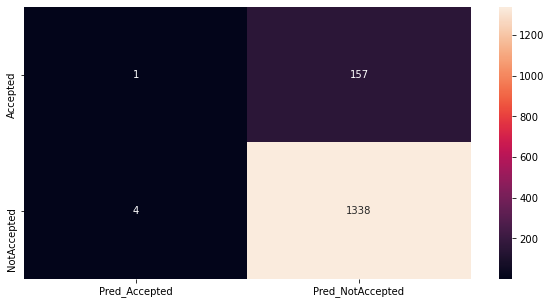

In [24]:
from sklearn.linear_model import LogisticRegression

#model train is set
model = LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

thres_predict_train=model.predict_proba(x_train)[:,1] > 0.8 # Threshold changes the confusion matrix
thres_predict_test=model.predict_proba(x_test)[:,1] > 0.8 

print(f"Training Accuracy Score: ",metrics.accuracy_score(y_train,thres_predict_train))
print(f"Test Accuracy Score: ",metrics.accuracy_score(y_test,thres_predict_test))

print("\nClassification Report")
report_logistic=classification_report(y_test,thres_predict_test,labels=[1,0])
print(report_logistic)

confusin_matix_logistic = metrics.confusion_matrix(y_test,thres_predict_test,labels=[1,0])
confusin_matix_logistic = pd.DataFrame(confusin_matix_logistic,index=['Accepted','NotAccepted'],
                              columns=['Pred_Accepted', 'Pred_NotAccepted'])

plt.figure(figsize=(10,5))
sns.heatmap(confusin_matix_logistic,annot=True,fmt='g');
plt.show()

# Naive Bayes - Classification Model

Training Accuracy Score:  0.8991428571428571
Test Accuracy Score:  0.8973333333333333

Classification Report
              precision    recall  f1-score   support

           1       0.51      0.63      0.56       158
           0       0.95      0.93      0.94      1342

    accuracy                           0.90      1500
   macro avg       0.73      0.78      0.75      1500
weighted avg       0.91      0.90      0.90      1500



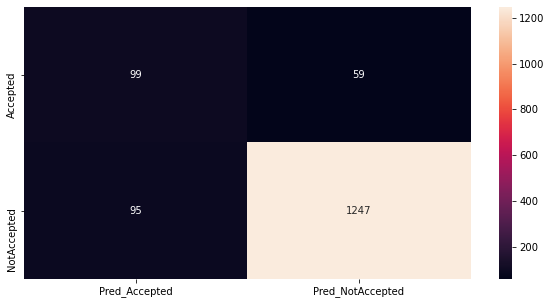

In [25]:
from sklearn.naive_bayes import GaussianNB 

data_model = GaussianNB()

data_model.fit(x_train,y_train.ravel()) #ravel convert to an one dimensional array

naive_train_predict = data_model.predict(x_train)
naive_test_predict = data_model.predict(x_test)

print(f"Training Accuracy Score: ",metrics.accuracy_score(y_train,naive_train_predict))
print(f"Test Accuracy Score: ",metrics.accuracy_score(y_test,naive_test_predict))

print("\nClassification Report")
report_naiveBayes=classification_report(y_test,naive_test_predict,labels=[1,0])
print(report_naiveBayes)

confusin_matix_Naive = metrics.confusion_matrix(y_test,naive_test_predict,labels=[1,0])
confusin_matix_Naive = pd.DataFrame(confusin_matix_Naive,index=['Accepted','NotAccepted'],
                              columns=['Pred_Accepted', 'Pred_NotAccepted'])

plt.figure(figsize=(10,5))
sns.heatmap(confusin_matix_Naive,annot=True,fmt='g');
plt.show()

# KNN Classifier

Training Accuracy Score:  1.0
Test Accuracy Score:  0.8946666666666667

Classification Report
              precision    recall  f1-score   support

           1       0.50      0.09      0.15       158
           0       0.90      0.99      0.94      1342

    accuracy                           0.89      1500
   macro avg       0.70      0.54      0.55      1500
weighted avg       0.86      0.89      0.86      1500



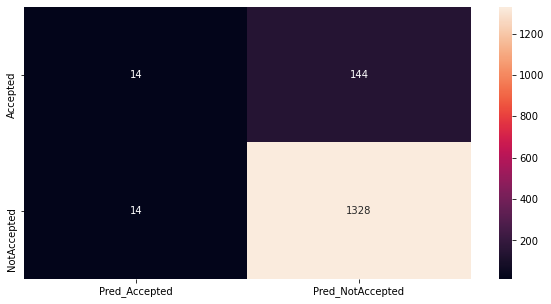

In [26]:
from sklearn.neighbors import KNeighborsClassifier


KNN_model = KNeighborsClassifier(n_neighbors=5,weights='distance',metric='euclidean') # 

KNN_model.fit(x_train,y_train)

KNN_predict_train = KNN_model.predict(x_train)
KNN_predict_test = KNN_model.predict(x_test)

print(f"Training Accuracy Score: ",metrics.accuracy_score(y_train,KNN_predict_train))
print(f"Test Accuracy Score: ",metrics.accuracy_score(y_test,KNN_predict_test))

print("\nClassification Report")
report_KNN = classification_report(y_test,KNN_predict_test,labels=[1,0])
print(report_KNN)

confusin_matix_KNN = metrics.confusion_matrix(y_test,KNN_predict_test,labels=[1,0])
confusin_matix_KNN = pd.DataFrame(confusin_matix_KNN,index=['Accepted','NotAccepted'],
                              columns=['Pred_Accepted', 'Pred_NotAccepted'])

plt.figure(figsize=(10,5))
sns.heatmap(confusin_matix_KNN,annot=True,fmt='g');
plt.show()

# Support Vector Machine

Training Accuracy Score:  1.0
Test Accuracy Score:  0.8946666666666667

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       158
           0       0.89      1.00      0.94      1342

    accuracy                           0.89      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.80      0.89      0.84      1500



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


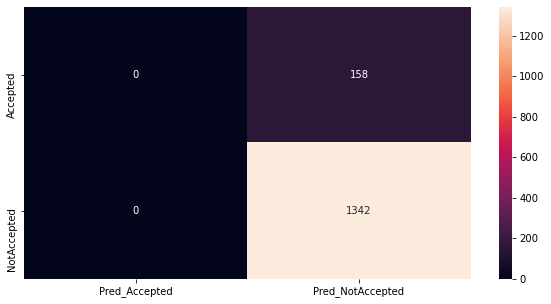

In [27]:
from sklearn import svm

svm_model = svm.SVC(gamma=100,C=3)
svm_model.fit(x_train,y_train)


svm_predic_train = svm_model.predict(x_train)
svm_predic_test = svm_model.predict(x_test)

print(f"Training Accuracy Score: ",metrics.accuracy_score(y_train,svm_predic_train))
print(f"Test Accuracy Score: ",metrics.accuracy_score(y_test,svm_predic_test))

print("\nClassification Report")
report_svm=classification_report(y_test,svm_predic_test,labels=[1,0])
print(report_svm)

confusin_matix_svm = metrics.confusion_matrix(y_test,svm_predic_test,labels=[1,0])
confusin_matix_svm = pd.DataFrame(confusin_matix_svm,index=['Accepted','NotAccepted'],
                              columns=['Pred_Accepted', 'Pred_NotAccepted'])

plt.figure(figsize=(10,5))
sns.heatmap(confusin_matix_svm,annot=True,fmt='g');
plt.show()

In [28]:
# Data is imbalanced hence model accuracy alone does not alone, the below parater to be verifed for selecting a model

print("\nLogisitic Regression\n",report_logistic)
print("\nNaive Bayes\n",report_naiveBayes)
print("\nKNN Classifier\n",report_KNN)
print("\nSVM\n",report_svm)


Logisitic Regression
               precision    recall  f1-score   support

           1       0.20      0.01      0.01       158
           0       0.89      1.00      0.94      1342

    accuracy                           0.89      1500
   macro avg       0.55      0.50      0.48      1500
weighted avg       0.82      0.89      0.85      1500


Naive Bayes
               precision    recall  f1-score   support

           1       0.51      0.63      0.56       158
           0       0.95      0.93      0.94      1342

    accuracy                           0.90      1500
   macro avg       0.73      0.78      0.75      1500
weighted avg       0.91      0.90      0.90      1500


KNN Classifier
               precision    recall  f1-score   support

           1       0.50      0.09      0.15       158
           0       0.90      0.99      0.94      1342

    accuracy                           0.89      1500
   macro avg       0.70      0.54      0.55      1500
weighted avg       0

# Summary

Based on the percision, recall score of the various models shown above. The KNN & Naive Bayes perform better than other models

The final model preference is Naive Bayes as the False Postivie in this model is lower, that would be priority for this requirement. Native Bayes also has the closer accuracy range for the test and training data